# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Question 1

In [7]:
temperature = df['temperature']
temperature.head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

In [17]:
import matplotlib.pyplot as plt

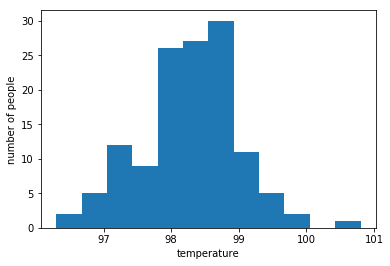

In [18]:
#create histogram of temperature array
_ = plt.hist(temperature,bins=12)
_ = plt.xlabel('temperature')
_ = plt.ylabel('number of people')
_ = plt.show()

The distribution of body temperature does appear to be normal. By visual inspection, we can roughly impose the normal curve to fit the distribution above.

## Question 2

In [19]:
print(len(temperature))

130


There are 130 observations. Therefore, the sample size is sufficiently large.
The observations are independent because one observation does not effect another observation.

## Question 3

I would use a one-sample test because we are determining whether the mean of normal body temperature is 98.6.
In this situation, it would be appropriate to use a t-statistic because the standard deviation of the population is unknown.

I define the null hypothesis as the true mean population of normal body temperatures is 98.6. 

In [20]:
#shift temperature observations to the wunderlich value body temperature
wunderlich_value = 98.6
temperature_shifted = temperature - np.mean(temperature) + wunderlich_value

In [23]:
#bootstrap replicate function
def bootstrap_replicate_1d(data,func):
    """Generate bootstrap replicate of 1D array."""
    bs_sample = np.random.choice(data,len(data))
    return func(bs_sample)

#generate many bootstrap replicates
def draw_bs_reps(data,func,size=1):
    """Draw bootstrap replicates"""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
        
    return bs_replicates

#define function that we want to test - difference from wunderlich
def diff_from_wunderlich(data, wunderlich_value=98.6):
    return np.mean(data) - wunderlich_value

In [27]:
#draw 10,000 samples of data using the shifted observation data
temperature_bs_replicates = draw_bs_reps(temperature,diff_from_wunderlich,10000)

#observed difference between recorded observations and the wunderlich value
temperature_diff_obs = diff_from_wunderlich(temperature)
temperature_diff_obs

-0.35076923076921673

In [28]:
#test p value
p_value = np.sum(temperature_bs_replicates <= temperature_diff_obs) / len(temperature_bs_replicates)
p_value

0.49709999999999999

p is .50 so there is no evidence to reject the null that the true mean population of normal body temperatures is 98.6.

## Question 4

In [34]:
temp_bs_replicates = draw_bs_reps(temperature,np.mean,10000)
temperature_ci = np.percentile(temp_bs_replicates,[2.5,97.5])
temperature_ci

array([ 98.12076923,  98.37384615])

## Question 5

In [39]:
#isolate male and female temperature data
male_temp = df.temperature[df.gender == 'M']
female_temp = df.temperature[df.gender == 'F']
male_temp.head()

2     97.8
5     99.2
6     98.0
7     98.8
12    98.2
Name: temperature, dtype: float64

In [40]:
female_temp.head()

0    99.3
1    98.4
3    99.2
4    98.0
8    98.4
Name: temperature, dtype: float64

In [42]:
#compute mean of male, female, and overall temperature
male_temp_mean = np.mean(male_temp)
female_temp_mean = np.mean(female_temp)
overall_temp_mean = np.mean(temperature)
print([male_temp_mean,female_temp_mean,overall_temp_mean])

[98.1046153846154, 98.39384615384613, 98.24923076923078]


In [43]:
#shift male and female temperatures based on overall average temperature
male_temp_mean_shifted = male_temp - male_temp_mean + overall_temp_mean
female_temp_mean_shifted = female_temp - female_temp_mean + overall_temp_mean
observed_mean_diff = male_temp_mean - female_temp_mean

In [45]:
#draw 10,000 bootstrap replicates of male and female temperatures
male_bs_replicates = draw_bs_reps(male_temp_mean_shifted,np.mean,10000)
female_bs_replicates = draw_bs_reps(female_temp_mean_shifted,np.mean,10000)

#calculate difference of temperatures between male and female
temp_diff_bs_replicates = male_bs_replicates - female_bs_replicates

In [47]:
#calculate p value for difference of mean temperature between male and female
p_value_temp_diff = np.sum(temp_diff_bs_replicates <= observed_mean_diff) / len(temp_diff_bs_replicates)
p_value_temp_diff

0.0094999999999999998

I used a two sample bootstrap hypothesis test for difference of means. There is a significant difference between the mean normal body temperature of males and females. I assumed the null to be that there was no difference. After simulating 10,000 trials, less than 1% of trials had a difference of means that was less than the observed difference of means. There is sufficient evidence to reject the null that there is no difference in mean normal body temperatures between males and females.